In [111]:
#We import the necessary libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, validation_curve, learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D



In [112]:
df_seq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_seq_HFiltNorm = pd.read_csv(df_seq_pathHFiltNorm, delimiter=' ')


In [113]:
df_seq_HFiltNorm.head()
df_seq_HFiltNorm.shape

(3000, 182)

In [114]:
df_seq_HfiltNormT = df_seq_HFiltNorm.T
df_seq_HfiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [115]:
#we now add the target variable
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
df_metaH.set_index('Filename', inplace=True)

def add_target_column(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    return merged_data

In [116]:
merged = add_target_column(df_seq_HfiltNormT, df_metaH_path, 'Condition', 'category_Normo')

In [117]:
merged.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,10,136,0,0,29,0,29,0,0,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,0,264,0,134,68,0,213,0,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,0,38,0,0,0,0,92,0,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,0,16,0,4,1,0,1,0,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,1,25,0,0,0,0,128,0,0,0


In [118]:
X = merged.drop(columns=['Target'])
y = merged['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
kfold = KFold(n_splits=5, shuffle=True, random_state=123)


In [119]:
# Define the parameter grid
param_grid = {
    'max_depth': range(3, 10),
    'learning_rate': np.linspace(0.1, 1, 10),
    'n_estimators': range(10, 110, 10),
    'gamma': np.linspace(0, 0.5, 5),
    'subsample': np.linspace(0.5, 1, 6),
    'colsample_bytree': np.linspace(0.5, 1, 6),
    'min_child_weight': range(1, 6),
    'scale_pos_weight': range(1, 6)
}

xg_cl = XGBClassifier()


# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(xg_cl, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                    n_jobs=-1, cv=kfold, random_state=123)

# Fit the model
random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

{'subsample': 0.5, 'scale_pos_weight': 3, 'n_estimators': 10, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.5, 'gamma': 0.25, 'colsample_bytree': 1.0}
0.9837837837837838
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Accuracy: 0.972972972972973


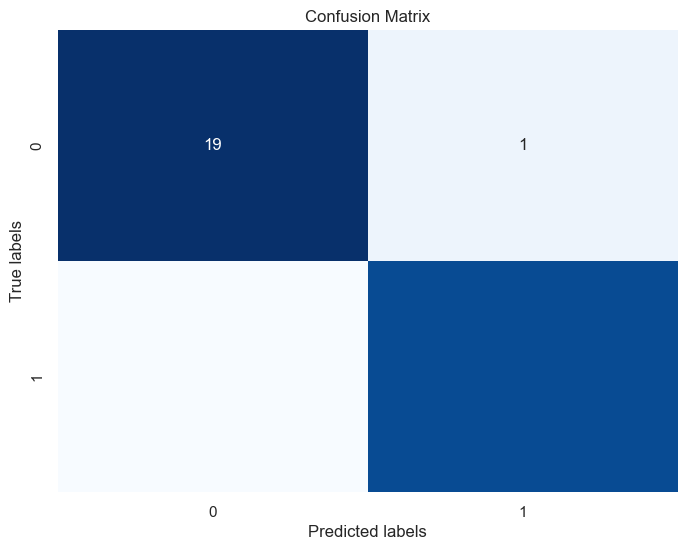

<Figure size 1000x600 with 0 Axes>

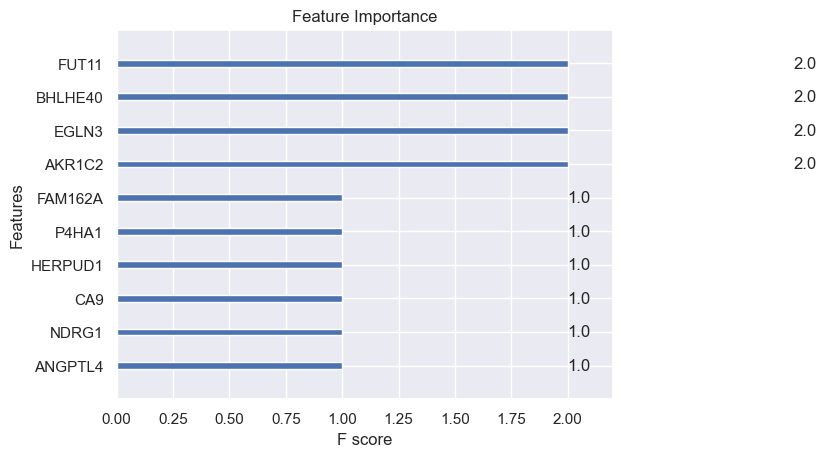

In [120]:
#Now we implement the best model
xgb_optm = xgb.XGBClassifier(objective='binary:logistic', **random_search.best_params_)

# Train the model
xgb_optm.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_optm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_optm, max_num_features=10)  # You can adjust max_num_features as per your preference
plt.title("Feature Importance")
plt.show()



nota: AN GPTL4 PGK1 SONO IMPORTNTI VERMNETE, L HA DETTO LEI

In [121]:
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

# Instantiate Gridsearch
grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy',
                           n_jobs=-1, cv=kfold)

# Fit the model
grid_search.fit(X, y)

# Print the best parameters
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.9615615615615616
KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')


Accuracy: 0.972972972972973
Accuracy: [0.97297297 0.94594595 0.94444444 0.94444444 1.        ]
Average accuracy: 0.9615615615615616


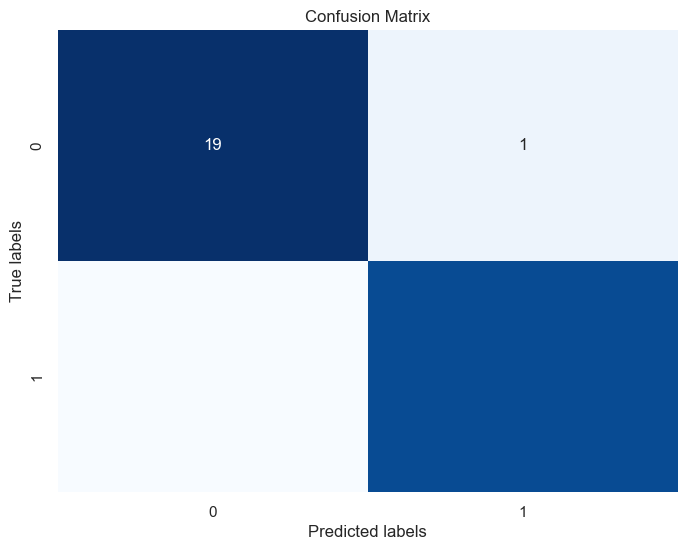

In [122]:

knn_optm = KNeighborsClassifier(**grid_search.best_params_)

# Train the KNN classifier
knn_optm.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_optm.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Print the accuracy
print("Accuracy:", knn_accuracy)

# Perform k-fold cross-validation
cv_results = cross_val_score(knn_optm, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Accuracy:', cv_results)
print('Average accuracy:', cv_results.mean())

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

Text(0.5, 0.92, '3D Scatter plot of two genes')

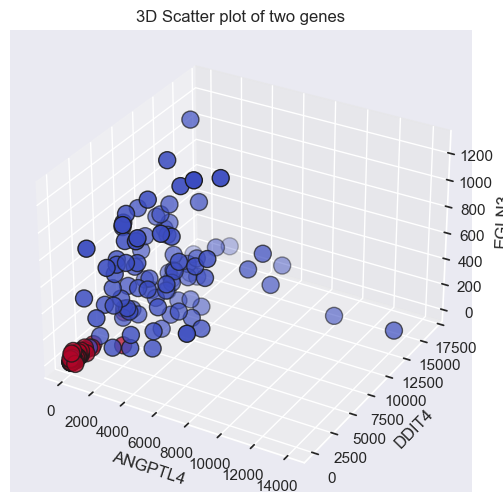

In [123]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

In [124]:
# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.linspace(0.1, 1, 10),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

log_reg = LogisticRegression()

random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                    n_jobs=-1, cv=kfold, random_state=123)


# Fit the model

random_search.fit(X, y)

# Print the best parameters
print(random_search.best_params_)
print(random_search.best_score_)
print(random_search.best_estimator_)

/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureW

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.9}
0.9945945945945945
LogisticRegression(C=0.9, penalty='l1', solver='liblinear')


/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/filipporonzino/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/filipporonzino/anaconda3/lib/python3.11/site-packages

Accuracy: 1.0
Accuracy: [1.         0.97297297 1.         1.         1.        ]
Average accuracy: 0.9945945945945945


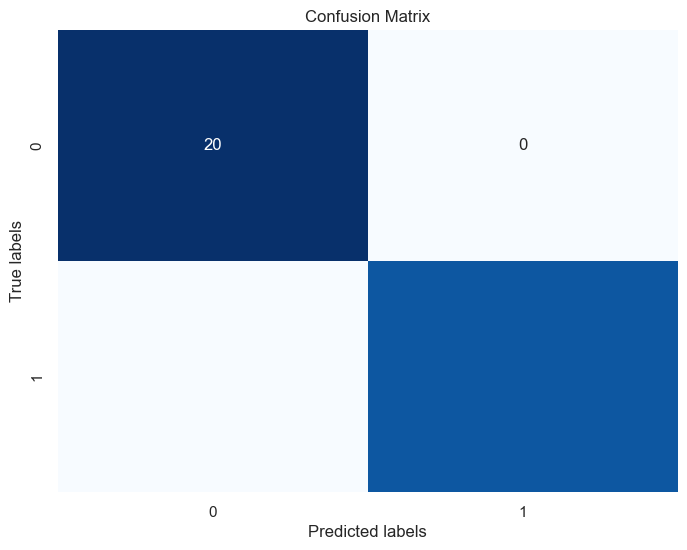

In [125]:
# Instantiate the Logistic Regression classifier
lr_optm = LogisticRegression(**random_search.best_params_)

# Train the model
lr_optm.fit(X_train, y_train)

# Make predictions on the test set
log_reg_predictions = lr_optm.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

# Print the accuracy
print("Accuracy:", log_reg_accuracy)

# Perform k-fold cross-validation
cv_results = cross_val_score(lr_optm, X, y, cv=kfold, scoring='accuracy')

# Print the results
print('Accuracy:', cv_results)
print('Average accuracy:', cv_results.mean())

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, log_reg_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        17

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



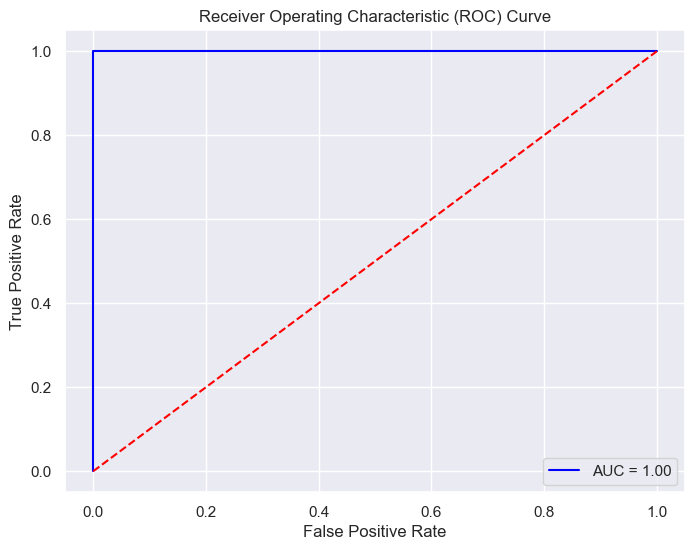

In [126]:

# Print classification report
print("Classification Report:")
print(classification_report(y_test, log_reg_predictions))

# Plot ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities
log_reg_probs = lr_optm.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg_probs)
auc = roc_auc_score(y_test, log_reg_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


RF

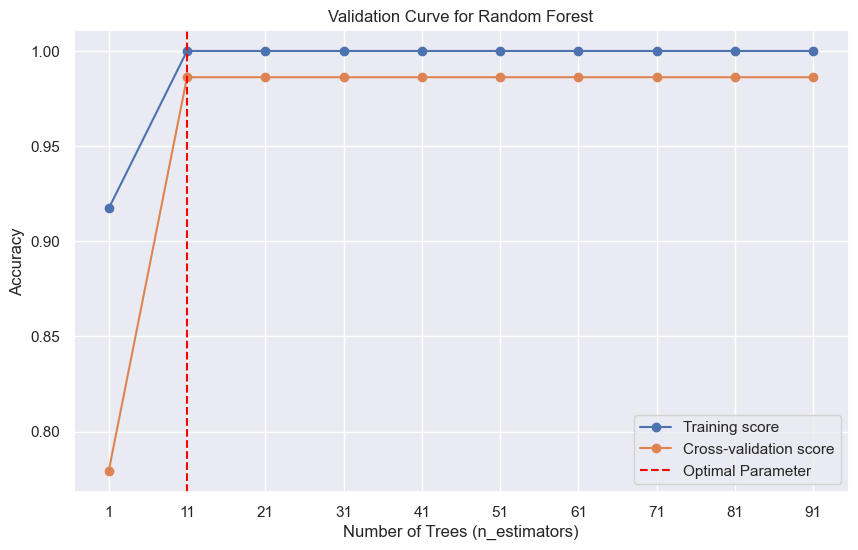

In [127]:
# We start by estimating the most important hyperparameter: the number of trees
param_range = np.arange(1, 100, 10)
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='n_estimators',
    param_range=param_range,
    cv=5,
    scoring='accuracy'
)
# Plot the learning curve
# Find the optimal parameter
optimal_param = param_range[np.argmax(np.mean(test_scores, axis=1))]

# Plot the learning curve with enhanced appearance
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score', marker='o', linestyle='-')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score', marker='o', linestyle='-')
plt.axvline(x=optimal_param, color='red', linestyle='--', label='Optimal Parameter')
plt.title('Validation Curve for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.legend()
plt.grid(True)
plt.show()


In [128]:
# We proceed to do a grid search to find the optimal hyperparameters with cross-validation
param_grid = {
    'max_depth': np.arange(1, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 10, 1)
}
grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 21, random_state=42), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [129]:
# Train the model with the best hyperparameters
rf_optm = RandomForestClassifier(n_estimators=21, random_state=42, **best_params)
rf_optm.fit(X_train, y_train)
# Predict y
y_pred = rf_optm.predict(X_test)

In [130]:
# Now evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


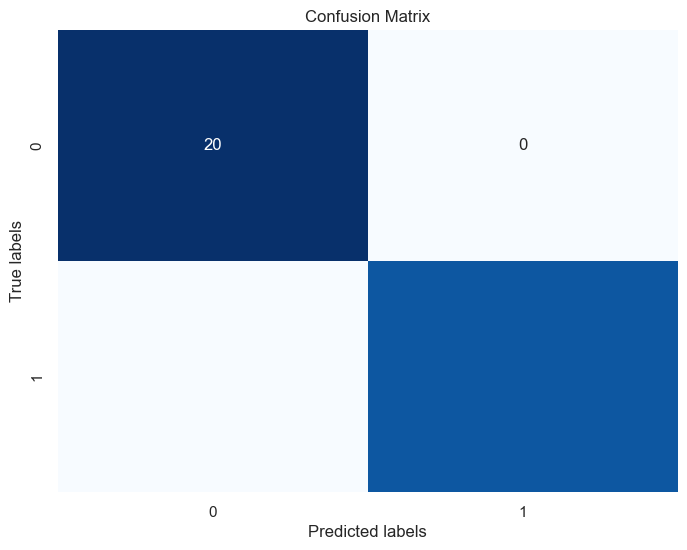

In [131]:
# Confusion matrix
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [132]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        17

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37




Fold 1 Evaluation Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Fold 2 Evaluation Scores:
Accuracy: 0.918918918918919
Precision: 0.92
Recall: 0.9583333333333334
F1-score: 0.9387755102040817

Fold 3 Evaluation Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Fold 4 Evaluation Scores:
Accuracy: 0.9722222222222222
Precision: 0.9230769230769231
Recall: 1.0
F1-score: 0.9600000000000001

Fold 5 Evaluation Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


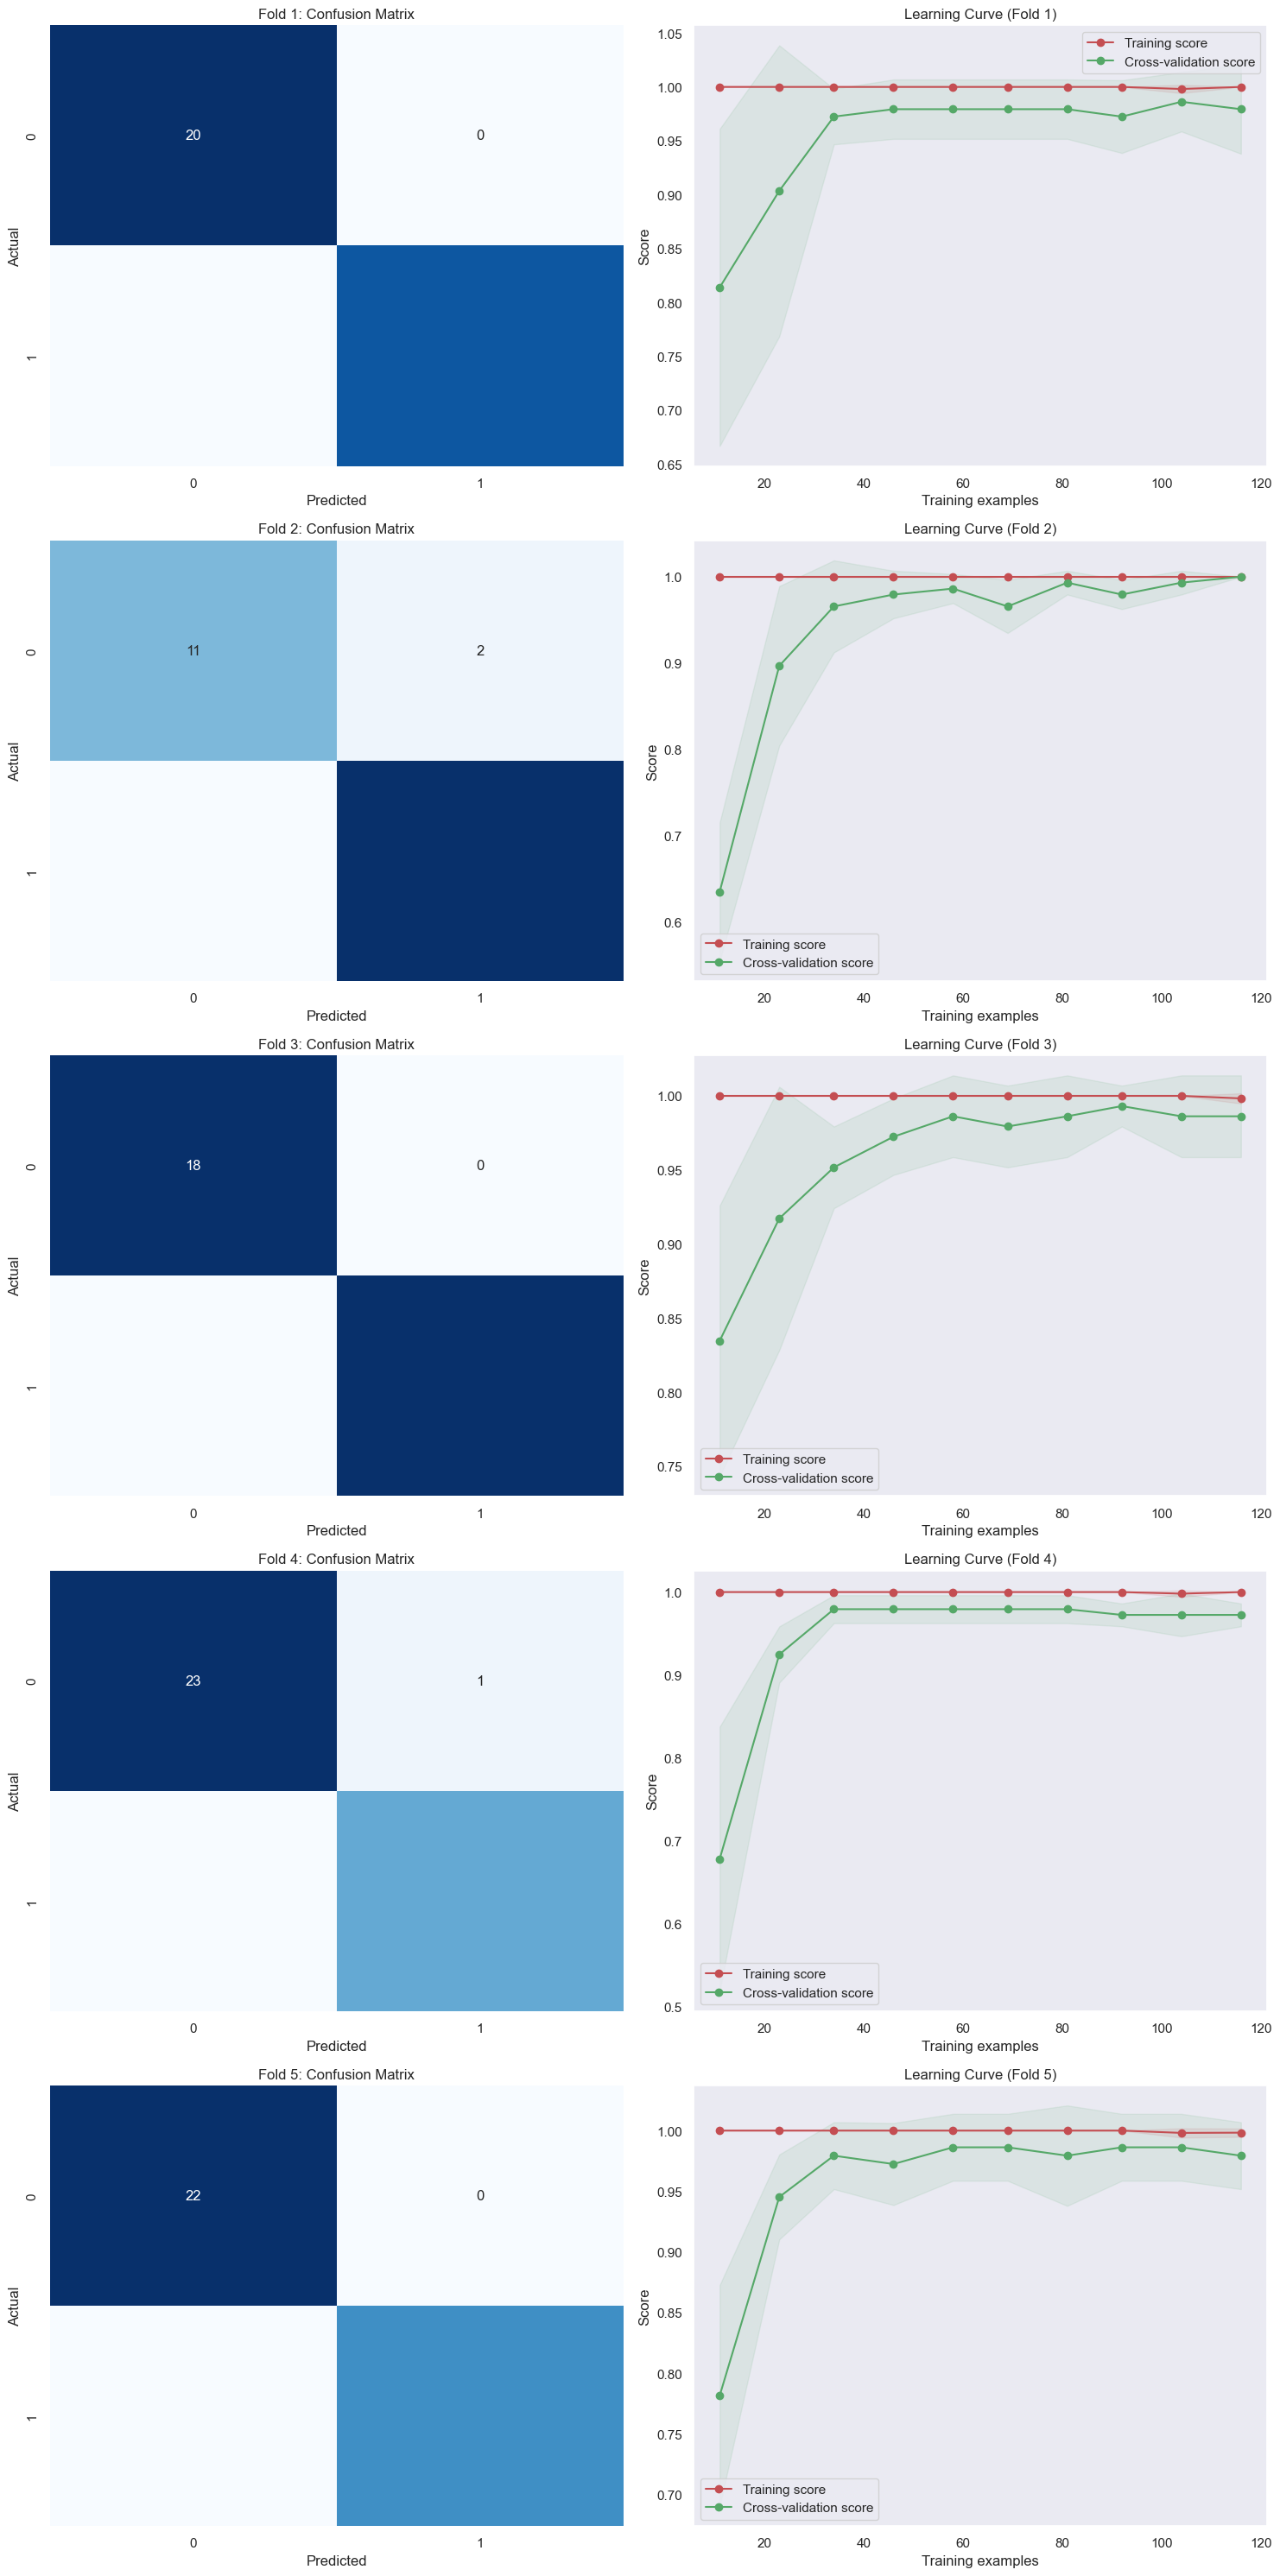


Mean Evaluation Scores Across Folds:
Mean Accuracy: 0.9782282282282282
Mean Precision: 0.9686153846153847
Mean Recall: 0.9916666666666668
Mean F1-score: 0.9797551020408164


In [133]:
# Initialize lists to store evaluation scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create subplots for confusion matrices and learning curves
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

# Iterate over folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Classifier model
    rf = RandomForestClassifier(n_estimators=21, random_state=42, **best_params)

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf.predict(X_test)

    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation scores for each fold
    print(f"\nFold {i+1} Evaluation Scores:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[i, 0])
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    axes[i, 0].set_title(f'Fold {i+1}: Confusion Matrix')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=kf, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[i, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i, 1].set_xlabel("Training examples")
    axes[i, 1].set_ylabel("Score")
    axes[i, 1].set_title(f"Learning Curve (Fold {i+1})")
    axes[i, 1].legend(loc="best")
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

# Print mean evaluation scores across all folds
print("\nMean Evaluation Scores Across Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1-score:", np.mean(f1_scores))


In [134]:
# Create a Random Forest Classifier model with the best parameters and enable OOB scoring
rf_OOB = RandomForestClassifier(n_estimators=21, random_state=42, **best_params, oob_score=True)
# Fit the model to the entire dataset
rf_OOB.fit(X, y)
# Access the OOB score
oob_accuracy = rf_OOB.oob_score_
# Print OOB accuracy
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)

Out-of-Bag (OOB) Accuracy: 0.9615384615384616


SVM

Da modificare Filippo   


Pipeline for model comparison

In [135]:
model_pipleline = []
model_pipleline.append(('RF', rf_optm))
# model_pipleline.append(('SVM', svm_optm))
model_pipleline.append(('KNN', knn_optm))
model_pipleline.append(('LR', lr_optm))
model_pipleline.append(('XGBoost', xgb_optm))
# model_pipleline.append(('NN', ?(**best_params_nn)))

In [136]:
model_names = ['RF', 'SVM', 'KNN', 'LR', 'XGBoost', 'NN']
# Create a metric of comparison for the models
acc_list = []
cm_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []

auc_list = []
imp_list = []

for model in model_pipleline:
    # Use the fitted models above to predict on the test data
    y_pred = model[1].predict(X_test)
  
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_list.append(conf_matrix)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(f"{acc.mean().round(3)}±{acc.std().round(3)}")
    # Precision
    prec = precision_score(y_test, y_pred)
    prec_list_n.append(f"{prec.mean().round(3)}±{prec.std().round(3)}")
    # Recall
    rec = recall_score(y_test, y_pred)
    rec_list_n.append(f"{rec.mean().round(3)}±{rec.std().round(3)}")
    # F1 score
    f1 = f1_score(y_test, y_pred)
    f1_list_n.append(f"{f1.mean().round(3)}±{f1.std().round(3)}")